In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
X = df.iloc[:,:4].values # we slice the first 4 columns as they are the feature vectors
Y = df.iloc[:,-1].values.reshape(-1,1) # the last column contains the labels.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Step-1
- we are importing all the necessary libraries - numpy and pandas
- we are getting the iris dataset from UIUC dataset

# Steps of PCA

- <strong> Scale the data </strong> For the PCA algorithm to work we need all the feature vectors to be of zero mean and standard deviation of 1 - Just use Standard Scaler from Sklearn.preprocessing

- <strong> Calculate covariance matrix </strong> AA<sup>T</sup> and A<sup>T</sup>A matrices 
- <strong> Eigen value Decomposition </strong> so we create a basis for the covariance matrices and that will produce Eigenvectors (if of unit length) are also called orthonormal basis for the covariancec matrices and Eigenvalues are the coefficients which give the magnitude to the eigenvectors.

In [12]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled[:5]


array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [119]:
#build the covariance matrices
cov_matrix = np.matmul(X_scaled.T, X_scaled)

In [120]:
val, vectors = np.linalg.eig(cov_matrix)

In [121]:
val

array([436.62271256, 138.18313961,  22.10299175,   3.09115609])

In [122]:
vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

## Explained variances - How much weightage does each Eigenvector carry so if we use a eigenvector how much data can be preservedd from it.

In [123]:
#calculating weightage of vectors using ratio of eigen values - must add upto 1
explained_variances = [] 
for i in val:
    explained_variances.append(i/np.sum(val))
print(explained_variances)
print("The sum of explained variances are:", np.sum(explained_variances))

[0.7277045209380136, 0.2303052326768063, 0.036838319576273856, 0.005151926808906335]
The sum of explained variances are: 1.0000000000000002


## How to visualize your results - using matplotlib and seaborn

- we can see from the above explained variances that first principal and second principal component are enough to capture almost 96% of the information.

- so first as per the equation of pca let's take vector one and two and make projection of the data on them and see these results.

In [124]:
project_pc1 = np.dot(X_scaled, vectors.T[0])

In [125]:
# project_pc1=project_pc1.reshape(1,150)
project_pc1.shape

(150,)

In [126]:
project_pc2 = np.dot(X_scaled, vectors.T[1])

In [127]:
project_pc3 = np.dot(X_scaled, vectors.T[2])

In [128]:
# project_pc2=project_pc2.reshape(1,150)
project_pc2.shape

(150,)

In [129]:
Y = Y.flatten() # 1-d array to add to 

In [130]:
data = {"principal_1" : project_pc1, "principal_2" : project_pc2, "principal_3" : project_pc3, "Y": Y}

In [131]:
plotting = pd.DataFrame(data=data)

In [132]:
plotting

,principal_1,principal_2,principal_3,Y
0,-2.264542,-0.505704,-0.121943,setosa
1,-2.086426,0.655405,-0.227251,setosa
2,-2.367950,0.318477,0.051480,setosa
3,-2.304197,0.575368,0.098860,setosa
4,-2.388777,-0.674767,0.021428,setosa
...,...,...,...,...
145,1.870522,-0.382822,0.254532,virginica
146,1.558492,0.905314,-0.025382,virginica
147,1.520845,-0.266795,0.179277,virginica
148,1.376391,-1.016362,0.931405,virginica


D:\Anaconda\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='principal_1'>

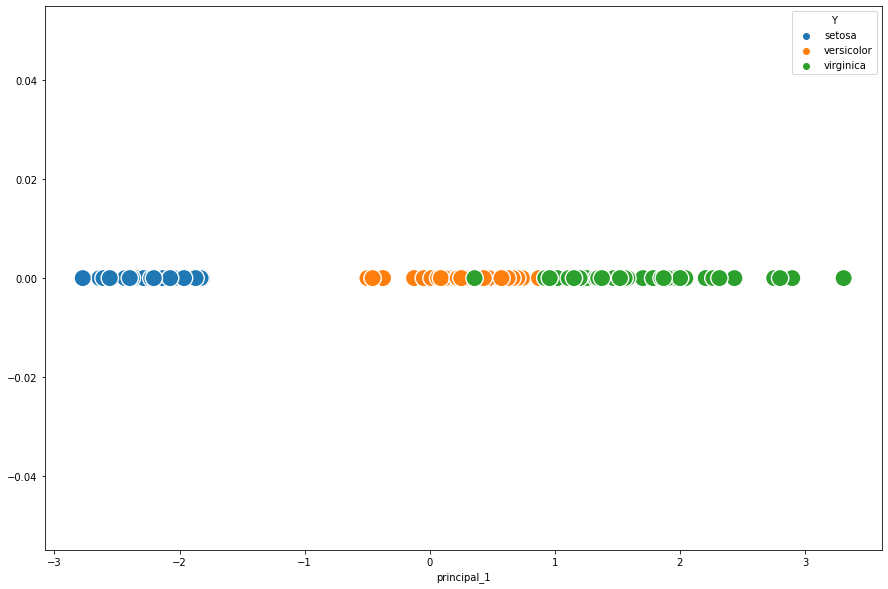

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
sns.scatterplot(plotting['principal_1'], [0] * len(plotting), hue=plotting['Y'], s=300)

#### In the above example, we are plotting data in 1D region by using only the first principal component and for the color of the markers we are using the labels to show how far they are from each other and from the picture we can tell that we can easily tell apart setosa from other classes but there are small overlaps in versicolor and virginica in one dimension

D:\Anaconda\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='principal_1', ylabel='principal_2'>

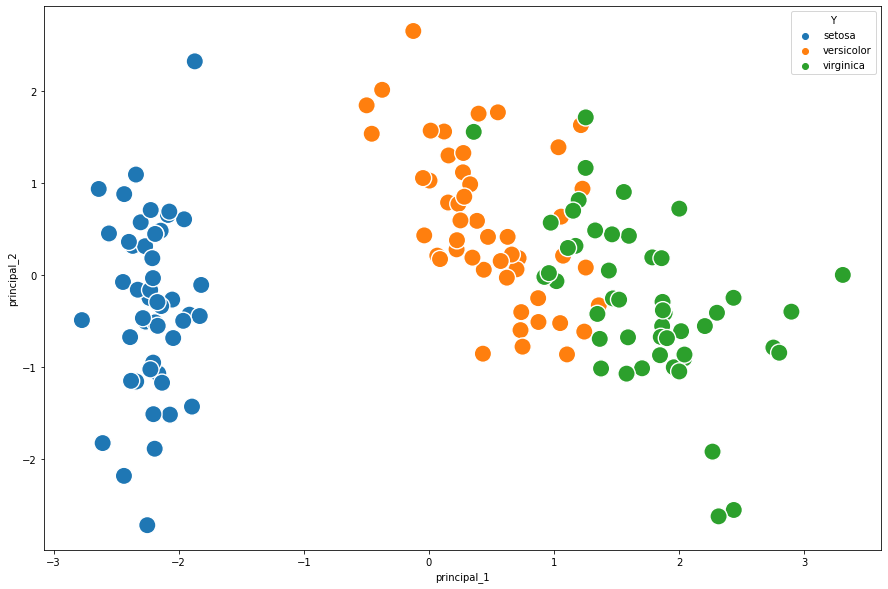

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,10))
sns.scatterplot(plotting['principal_1'], plotting['principal_2'], hue=plotting['Y'], s=300)

### in the example illustrated above, we are now using two principal components to look at the data and we get a much clearer picture, lets try to include the third component too.

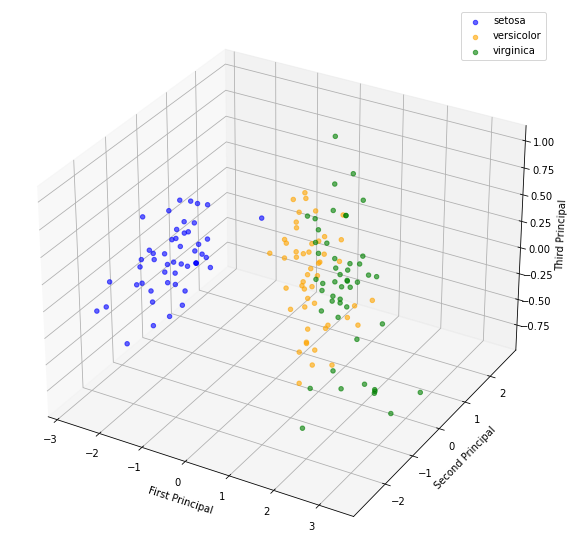

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

color_dict = {"setosa":"blue", "versicolor":"orange", "virginica":"green"}
for l in np.unique(plotting['Y']):
    filtered=plotting[plotting['Y']==l]
    ax.scatter(filtered['principal_1'], filtered['principal_2'],filtered['principal_3'], c=color_dict[l] ,label=l, s=20, alpha=0.6)

ax.set_xlabel("First Principal")
ax.set_ylabel("Second Principal")
ax.set_zlabel("Third Principal")

ax.legend()
plt.show()


### In a 3D view we are able to see that versicolor and virginica have differentiation in the Third pricipal component.

### Let's calculate the correlation of rach of these components over each other - no reason just for fun - Not PCA just messing around with the data.

In [137]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

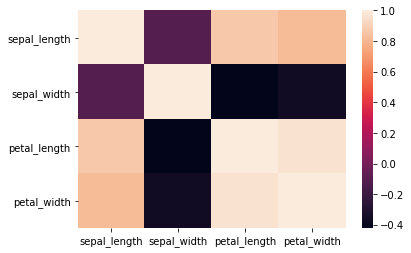

In [138]:
#heatmap
sns.heatmap(df.corr())

<h3>Interesting Insights </h3>

<ol>
    <li> here we can see that sepal length is highly correlated with petal length and petal width
    <li> also we can see that petal_length and petal width also are highly correlated - so we can drop one of the features when doing classification tasks
</ol>